https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb#scrollTo=E-hlmIU5tN3P


# Tutorial 1 (housing) Data Exploration and Visualization (Getting to know your data)

## Setup

In [57]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [58]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [59]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [60]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [88]:
url= "brain_stroke.csv"

In [89]:
brain = pd.read_csv(url)

In [90]:
brain.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [64]:
brain.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Hypertension,age,heart_disease, avg_glucose, bmi and stroke are numeric. but the others are nominal 

In [20]:
brain["work_type"].value_counts()
# Q3 What does the value_count() method display?

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [21]:
#This method shows a statistical summary of the numerical attributes 
brain.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


The count, mean, min, and max rows are self-explanatory.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

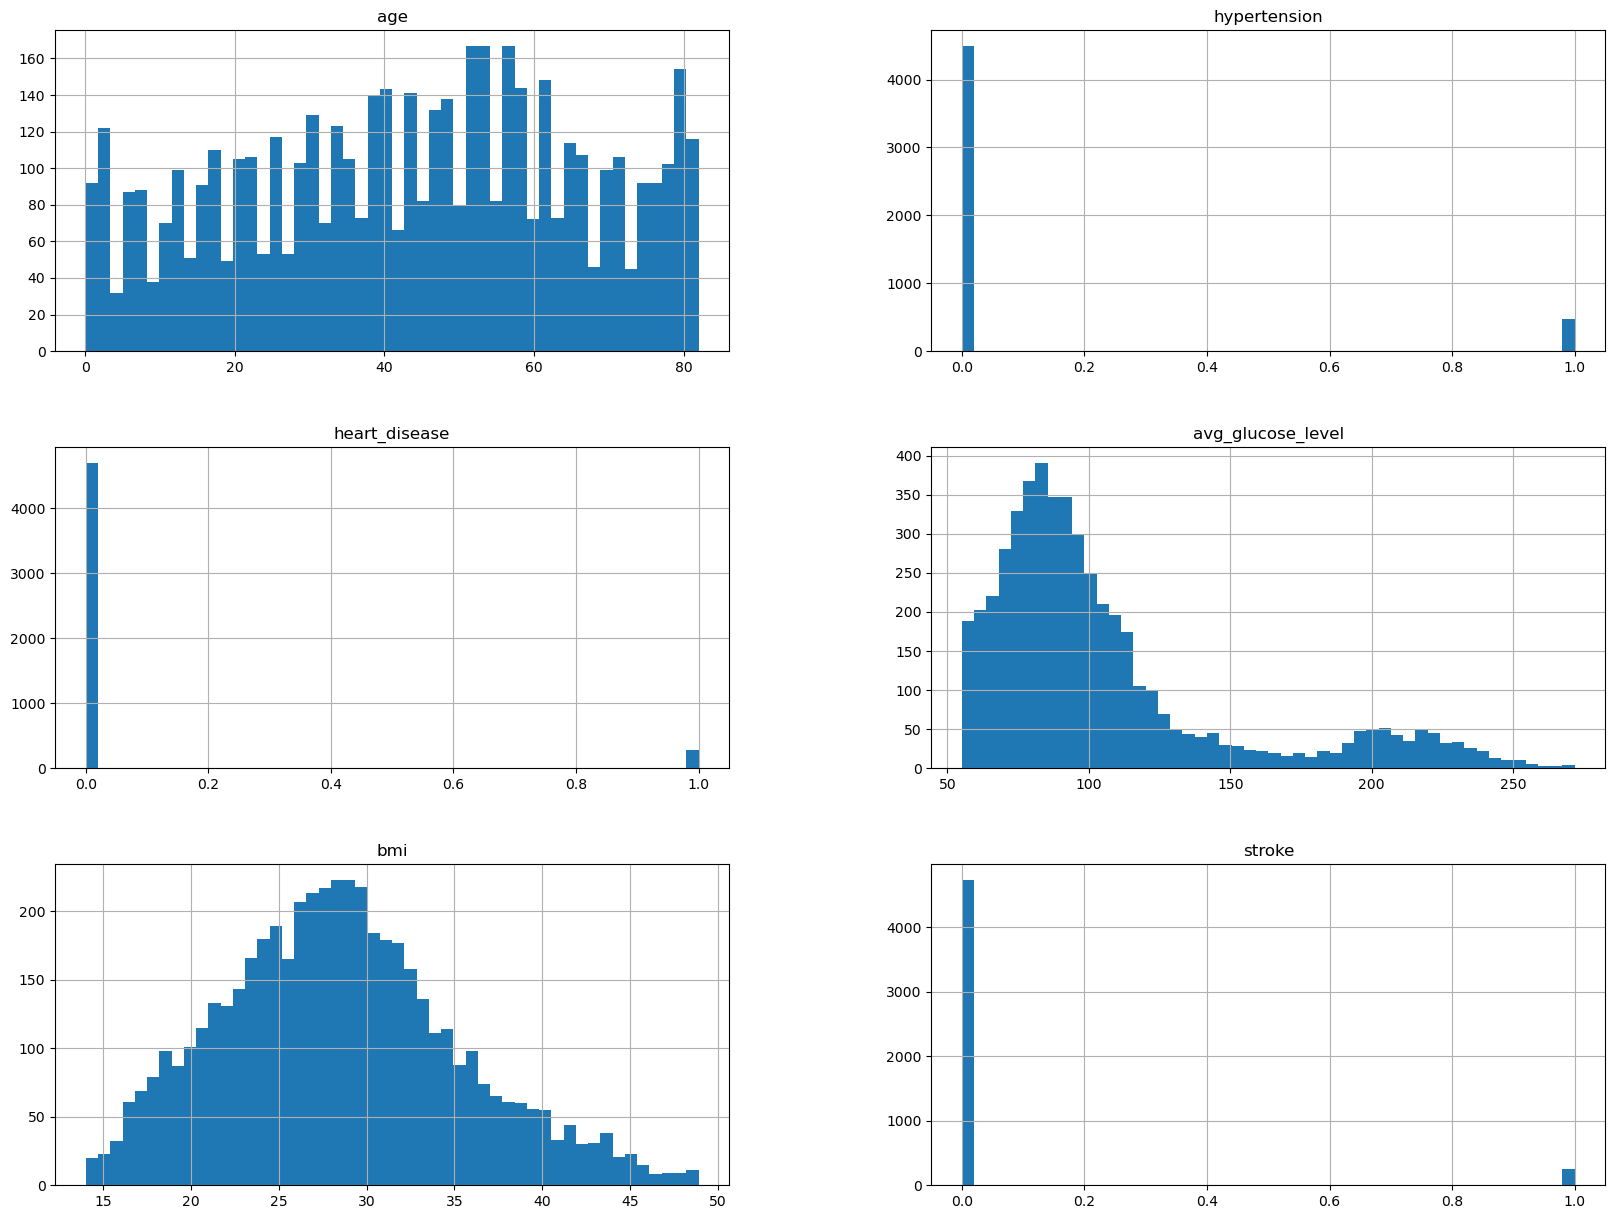

In [22]:
#To plot a histogram for each numerical attribute
brain.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

# Visualizing Geographical Data

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

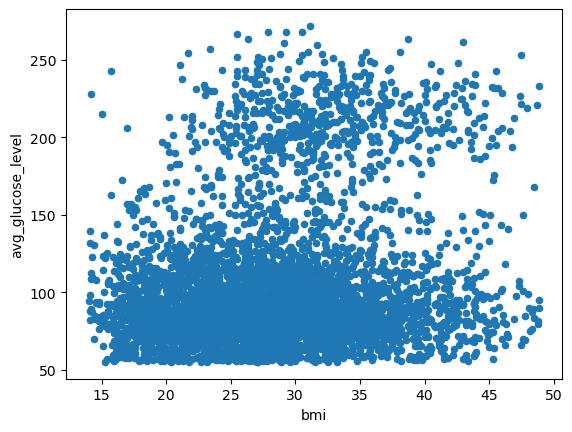

In [25]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
brain.plot(kind="scatter", y="avg_glucose_level", x="bmi")


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

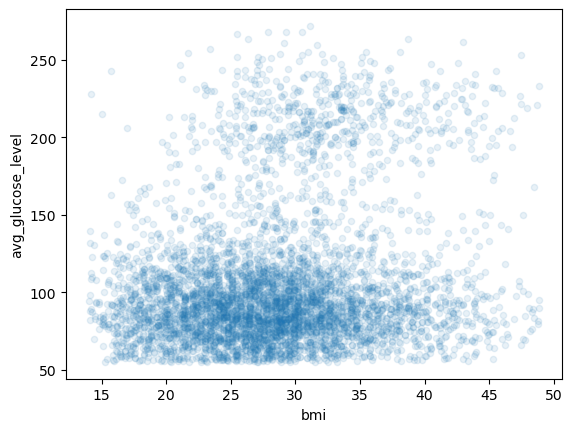

In [26]:
brain.plot(kind="scatter", y="avg_glucose_level", x="bmi", alpha=0.1)

In [27]:
corr_matrix = brain.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [28]:
corr_matrix["stroke"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable?
# Does that make sense? 

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
bmi                  0.056926
Name: stroke, dtype: float64

array([[<AxesSubplot:xlabel='stroke', ylabel='stroke'>,
        <AxesSubplot:xlabel='age', ylabel='stroke'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='stroke'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>,
        <AxesSubplot:xlabel='hypertension', ylabel='stroke'>,
        <AxesSubplot:xlabel='bmi', ylabel='stroke'>],
       [<AxesSubplot:xlabel='stroke', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='stroke', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='age', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <AxesSubplot:xlabel='hypertension

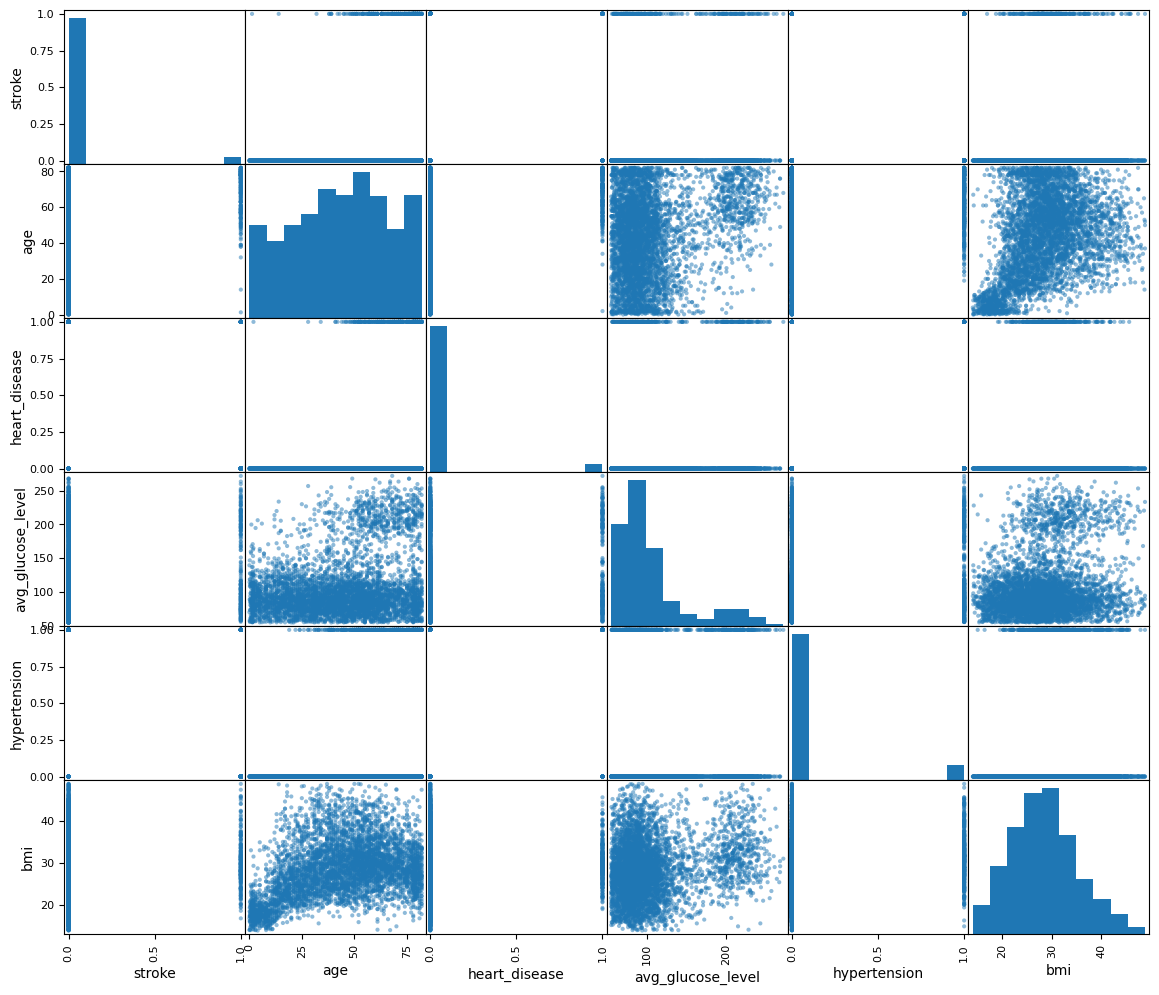

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["stroke", "age", "heart_disease",
              "avg_glucose_level", "hypertension", "bmi"]
scatter_matrix(brain[attributes], figsize=(14, 12))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


<AxesSubplot:xlabel='age', ylabel='stroke'>

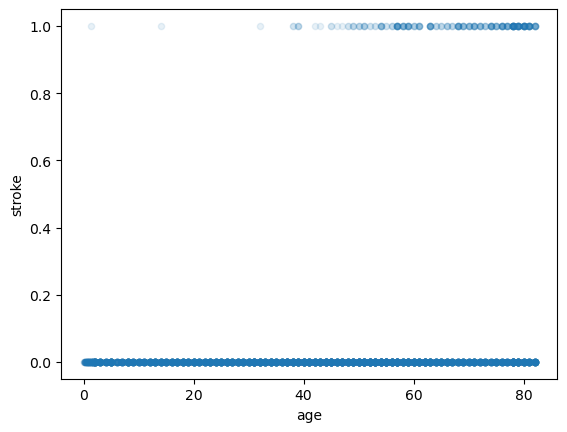

In [35]:

brain.plot(kind="scatter", x="age", y="stroke",
             alpha=0.1)
# plt.axis([0, 16, 0, 550000])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

# Experimenting with Attribute Combinations

In [49]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

brain["heart_disease_per_age"] = brain["heart_disease"]/brain["age"]
brain["glucose_per_bmi"] = brain["avg_glucose_level"]/brain["bmi"]
brain["heart_disease_per_bmi"]=brain["heart_disease"]/brain["bmi"]
brain["stroke_per_age"]=brain["stroke"]/brain["age"]

In [50]:
corr_matrix = brain.corr()
corr_matrix["stroke"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

stroke                   1.000000
stroke_per_age           0.354299
age                      0.246478
heart_disease            0.134610
avg_glucose_level        0.133227
hypertension             0.131965
heart_disease_per_bmi    0.129497
glucose_per_bmi          0.072858
bmi                      0.056926
heart_disease_per_age    0.050723
Name: stroke, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [51]:
#housing_labels = housing["median_house_value"].copy()
#housing = housing.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
brain = brain.drop("heart_disease_per_age", axis=1)
brain = brain.drop("glucose_per_bmi", axis=1)
brain = brain.drop("heart_disease_per_bmi", axis=1)
brain = brain.drop("stroke_per_age", axis=1)
brain.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


In [52]:
sample_incomplete_rows = brain[brain.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [126]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  
#Q12 What is displayed below? Note your observation 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [128]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY


In [130]:
median = housing["total_bedrooms"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13


In [132]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY


## Scikit-Learn solution (optional)


In [53]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [91]:
mapping = {'Male': 0, 'Female': 1, 'Yes': 1, 'No': 0, 'Unknown': 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes': 3}
brain = brain.replace({'gender': mapping, 'ever_married' : mapping, 'smoking_status': mapping})
brain_num = brain.drop(["work_type", "Residence_type"], axis=1)
brain_num.head()
# brain_num["smoking_status"].value_counts()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,228.69,36.6,2,1
1,0,80.0,0,1,1,105.92,32.5,1,1
2,1,49.0,0,0,1,171.23,34.4,3,1
3,1,79.0,1,0,1,174.12,24.0,1,1
4,0,81.0,0,0,1,186.21,29.0,2,1


In [92]:
imputer.fit(brain_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [93]:
imputer.statistics_

array([ 1.  , 45.  ,  0.  ,  0.  ,  1.  , 91.85, 28.1 ,  1.  ,  0.  ])

In [94]:
brain_num.median().values #Check that this is the same as manually computing the median of each attribute


array([ 1.  , 45.  ,  0.  ,  0.  ,  1.  , 91.85, 28.1 ,  1.  ,  0.  ])

In [95]:
X = imputer.transform(brain_num) # transform the data set

In [96]:
brain_tr = pd.DataFrame(X, columns=brain_num.columns,
                          index=brain_num.index) # load the new tranformed data set into the pandas frame housing_tr

In [97]:
brain_tr.loc[sample_incomplete_rows.index.values] # show the rows with previously missing values 

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke


### Handling Text and Categorical Attributes

In [148]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances 

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [149]:
housing_cat.tail(10)
# look at the value of  'ocean_proximity' for the last 10 instances

,ocean_proximity
20630,INLAND
20631,INLAND
20632,INLAND
20633,INLAND
20634,INLAND
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND
20639,INLAND


In [150]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?


array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [151]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [161]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [162]:
type(housing_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

scipy.sparse.csr.csr_matrix

In [163]:
housing_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [155]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [156]:
cat_encoder.categories_         # Get a list of categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [ ]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set